In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# link to source code

https://github.com/juliafairbank7/juliafairbank7.github.io/tree/main/posts/linear-regression-post

# Overview of Linear Regression

With data that has a linear relationship between two variables, linear regression allows you to find the best line that fits that relationship. The Least Squares Regression Line is the line that minimizes the variance (you can think about it like vertical height) between the data points to the regression line. This best line of fit minimizes the (It’s called a “least squares” because the variance represents the sum of squares of the errors).

Least-squares linear regression is a convex linear model that makes predictions of the form $\tilde{y}_i = \langle w, {x}_{i} \rangle$. 

The loss function that we will be using is $l(\tilde{y}, y) = (\tilde{y} - y)^{2}$, which says that the loss is equal to the squared error (least squares!) 

Our empirical loss minimization function is 

$\hat{w} = $ arg min $L(w)$ 

There are multiple ways to solve this empirical loss minimization function, and we will be focusing on two of them: analytically and using gradient descent. 

So, we will be implementing least-squares linear regression in these two different ways:
1. Analytical Fit
2. Gradient Descent Fit


# Analytical Fit 

For the analytical implementation of least-squares linear regression, we can use an explicit formula that uses matrix inversion. This formula, $\hat{w} = {X}^{T}{X}^{-1}X^{T}y$, will calculate our optimal weight vector.


# Gradient Descent Fit 

For the gradient descent implementation of least-squares linear regression, we will need to compute the gradient with respect to $\hat{w}$ and repeat until convergence. To do this without killing our computer by over-computing, we can calculate $P = {X}^{T}{X}$ and $q = {X}^{T}y$ just once. From there, our gradient is $2(Pw-q)$.

By calculating our gradient this way, we are eliminating the chance for the run-time to shoot up depending on the number of data points. 

# Demo Linear Regression on Data

In [148]:
import numpy as np
from matplotlib import pyplot as plt

from LinearRegression import LinearRegression

LinReg = LinearRegression()

Let's take a look at how our analytical fit linear regression works on some sample data. 

# Analytical Fit Demo

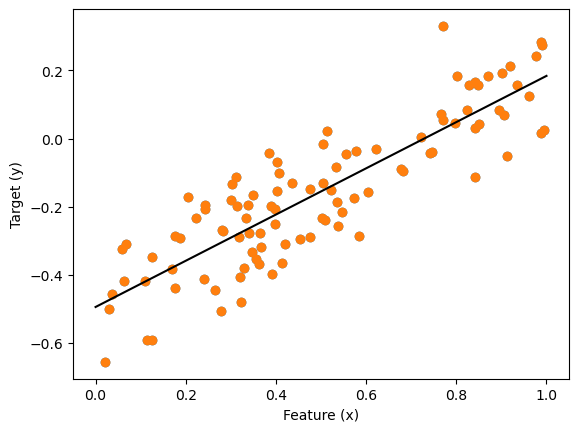

In [149]:
w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1) 


plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
plt.scatter(x, y)

LinReg.fit_analytic(x, y)

x_fake = np.linspace(0, 1, 101)[:,np.newaxis]

predictions = LinReg.predict(x_fake)

plt.plot(x_fake, predictions, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")


As you can seen through the graph above, the analytical fit has classified the least squares regression line through our data points. Now let's see how our other method works. 

# Gradient Descent Fit Demo

(101, 1)


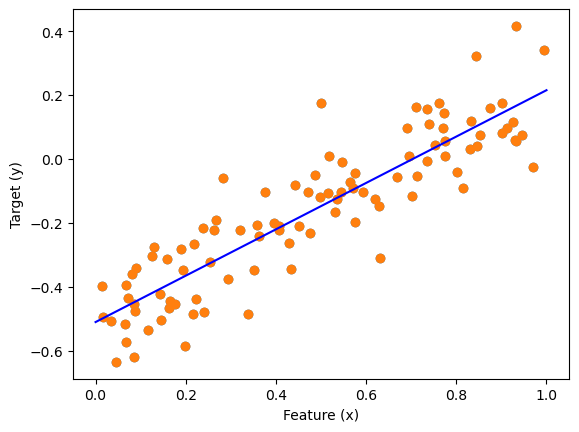

In [150]:
w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1) 

plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
plt.scatter(x, y)

LinReg.fit_gradient(x, y)

x_fake = np.linspace(0, 1, 101)[:,np.newaxis]

predictions = LinReg.predict(x_fake)
print(predictions.shape)

plt.plot(x_fake, predictions, color = "blue")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

Here, our gradient descent method draws its least squares regression line through our data points. Let's see how our score value has changed over our epochs. 

# Score History of Gradient Descent Fit Score over Iterations

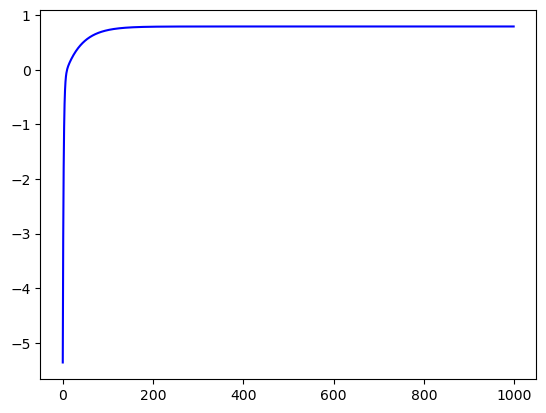

In [151]:
plt.plot(LinReg.score_history, color = "blue");

# Create Testing & Validation Data

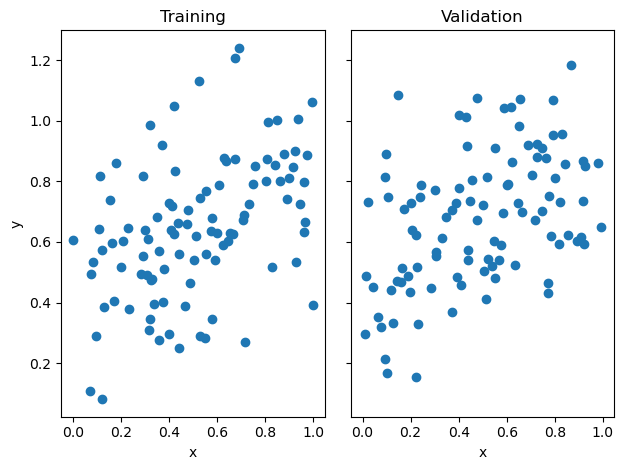

In [152]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val


n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Now, let's use this testing and validation data to see our testing and validation scores from our analytical fit.  

In [153]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train)

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = -118.751
Validation score = -125.3998


We can also see our training and validation scores from our gradient descent fit. 

In [176]:
LR2 = LinearRegression()
LR2.fit_gradient(X_train, y_train, alpha = 0.00003, max_epochs = 2000)

print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")

Training score = 0.9929
Validation score = 0.9915


Let's see how our gradient descent score has changed over our iterations (epochs).

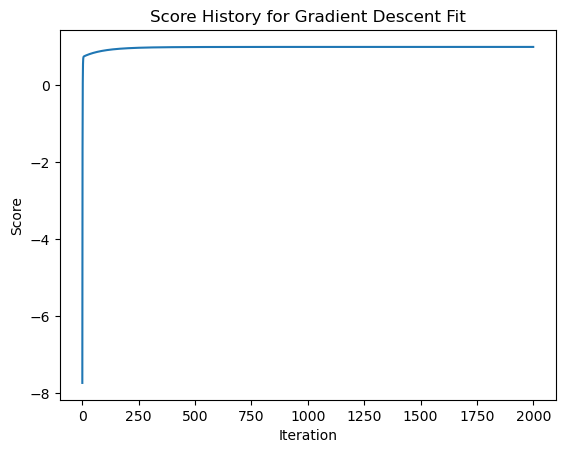

In [175]:
plt.plot(LR2.score_history)
labels = plt.gca().set(title = "Score History for Gradient Descent Fit", xlabel = "Iteration", ylabel = "Score")

# Experimenting with the Number of Features Used

Now that we've seen how linear regression works on 1 feature and a bias term, let's try to increase the number of features to 5. 

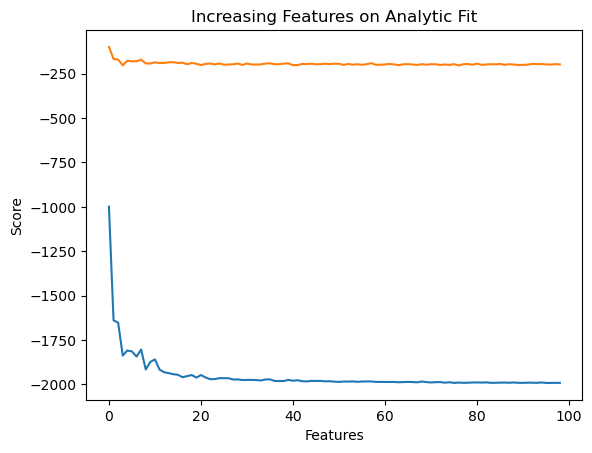

In [166]:
def LR_analytic_features(n_train = 100, n_val = 100, p_features = 5, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

n_train = 1000
n_val = 100
noise = 0.2

feature_count = []
testing_scores = []
validation_scores = []
    
for i in range(n_val-1):
    p_features = i
    feature_count.append(i)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR_analytic_features = LinearRegression()
    LR_analytic_features.fit_analytic(X_train, y_train)
    testing_scores.append(LR_analytic_features.score(X_train, y_train).round(4))
    validation_scores.append(LR_analytic_features.score(X_val, y_val).round(4))

plt.plot(testing_scores)
plt.plot(validation_scores)
labels = plt.gca().set(title = "Increasing Features on Analytic Fit", xlabel = "Features", ylabel = "Score")

In [ ]:
def LR_GD_features(n_train = 100, n_val = 100, p_features = 5, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

n_train = 1000
n_val = 100
noise = 0.2

feature_count = []
testing_scores = []
validation_scores = []
    
for i in range(n_val-1):
    p_features = i
    feature_count.append(i)
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR_GD_features = LinearRegression()
    LR_GD_features.fit_gradient(X_train, y_train, alpha = 0.00003, max_epochs = 40000)
    testing_scores.append(LR_GD_features.score(X_train, y_train).round(4))
    validation_scores.append(LR_GD_features.score(X_val, y_val).round(4))

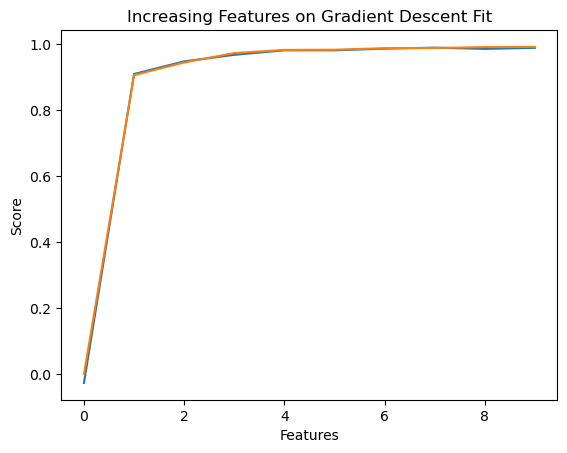

In [184]:
plt.plot(validation_scores)
plt.plot(testing_scores)
labels = plt.gca().set(title = "Increasing Features on Gradient Descent Fit", xlabel = "Features", ylabel = "Score")